In [57]:
import re
import os 
import datetime
from math import log
import csv
import pprint
import math
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
from pandas.io.parsers import read_csv
pd.set_option('max_colwidth',120)
from elasticsearch import Elasticsearch, helpers
from elasticsearch.helpers import scan
from __future__ import division

%matplotlib inline

pp = pprint.PrettyPrinter()

In [2]:
#bashcommand='pwd'

In [41]:
es = Elasticsearch([{'host':'atlas-kibana.mwt2.org', 'port':9200}],timeout=10)

In [51]:
indices = es.cat.indices(index='jobs_archive_2016-05-15', h="index", request_timeout=10).split('\n')
indices = sorted(indices)
indices = [x.replace(" ", "") for x in indices if x != '']

In [52]:
print (indices)

['jobs_archive_2016-05-15']


In [55]:
ss={
  "query": { "match": { "computingsite": "IN2P3-CC" } 
}, "_source": ["pandaid","batchid","avgpss","computingsite","cpu_eff","cpuconsumptiontime","wall_time","totaljobtime","modificationhost"]
#    ,"size": 5
    }



#ss= {"query": { "match_all": {} },"size": 10000} 
print (ss)



{'_source': ['pandaid', 'batchid', 'avgpss', 'computingsite', 'cpu_eff', 'cpuconsumptiontime', 'wall_time', 'totaljobtime', 'modificationhost'], 'query': {'match': {'computingsite': 'IN2P3-CC'}}}


In [7]:
#res = es.search(index='jobs_archive_2016-06-26', body=ss, filter_path=['hits.hits._source'],request_timeout=12000)

In [58]:
res=es.search(index='jobs_archive_2016-06-26', body=ss,request_timeout=12000)
#print (res)
len(res)
#print (res)

4

In [8]:
#res

In [59]:
scroll=scan(es,index='jobs_archive_2016-05-15', query=ss,scroll=u'20m', raise_on_error=True, preserve_order=False, size=10000,request_timeout=300)

In [60]:
c=1
list2=[]
for name in scroll:
 a=name.get('_source')
 list2.append(a)
 c=c+1
print (c)
type(list2)
dfu = pd.DataFrame(list2)
 
#dfu.batchid.count()
dfu.head()
 
 

10738


,avgpss,batchid,computingsite,cpu_eff,cpuconsumptiontime,modificationhost,pandaid,wall_time
0,1279656.0,6438973,IN2P3-CC,0.933180,5293,ccwsge1144,2858422893,5672
1,1783652.0,6404844,IN2P3-CC,0.970659,11347,ccwsge1157,2857904318,11690
2,1753168.0,6405039,IN2P3-CC,0.970579,9501,ccwsge0605,2857904311,9789
3,1744576.0,6404513,IN2P3-CC,0.974108,11324,ccwsge0596,2857904308,11625
4,1751483.0,6405036,IN2P3-CC,0.978102,10050,ccwsge0590,2857904310,10275


In [61]:
dfu.count()


avgpss                10633
batchid               10698
computingsite         10737
cpu_eff               10737
cpuconsumptiontime    10737
modificationhost      10737
pandaid               10737
wall_time             10737
dtype: int64

In [62]:
len(list2)

10737

In [13]:


#rint (res.get('hits').get('hits'))
#list.head()
#res[0]
#res['total']

In [14]:

    
dfu.avgpss.count()

544

In [15]:
dfu.head()

,avgpss,batchid,computingsite,cpu_eff,cpuconsumptiontime,modificationhost,pandaid,wall_time
0,8487776.0,9889170,IN2P3-CC_MCORE_HIMEM,3.634949,12377,ccwsge0017,2900517670,3405
1,10294295.0,9891226,IN2P3-CC_MCORE_HIMEM,3.821406,18209,ccwsge0120,2900571824,4765
2,9575812.0,9891105,IN2P3-CC_MCORE_HIMEM,3.766051,16307,ccwsge0059,2900571658,4330
3,18613998.0,9891104,IN2P3-CC_MCORE_HIMEM,5.355842,40292,ccwsge0129,2900571657,7523
4,9258133.0,9891081,IN2P3-CC_MCORE_HIMEM,3.906522,19767,ccwsge0220,2900571656,5060


In [63]:
 dfu.groupby(['computingsite']).count()

,avgpss,batchid,cpu_eff,cpuconsumptiontime,modificationhost,pandaid,wall_time
computingsite,,,,,,,
IN2P3-CC,10633,10698,10737,10737,10737,10737,10737


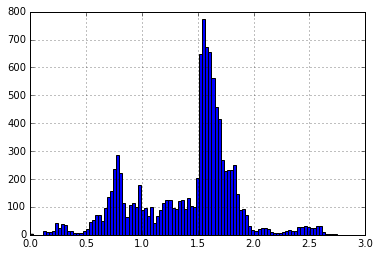

In [64]:
b=dfu.avgpss/1024/1024
b.hist(bins=100)

In [18]:
dfu.memory_usage()

Index                   80
avgpss                4384
batchid               4384
computingsite         4384
cpu_eff               4384
cpuconsumptiontime    4384
modificationhost      4384
pandaid               4384
wall_time             4384
dtype: int64

In [65]:
dfu.to_csv('./ev_example.csv')